# Basisgeval college statisch onbepaald met Python #

![figuur 1](data/Data_Basisgeval-college-statischonbepaald-met-Python/Tekening1.gif)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
q, x = sp.symbols('q x')
L, EI = sp.symbols('L EI')
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')

V = sp.integrate(-q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(-phi,x)+C4
display(w)

Eq1 = sp.Eq(w.subs(x, 0), 0) 
Eq2 = sp.Eq(phi.subs(x, 0), 0)
Eq3 = sp.Eq(w.subs(x, L), 0)
Eq4 = sp.Eq(M.subs(x, L), 0)
sol = sp.solve((Eq1,Eq2,Eq3,Eq4),(C1,C2,C3,C4))
w_sol = w.subs(sol)
phi_sol = phi.subs(sol)
display(w_sol)
display(phi_sol)

-C1*x**3/(6*EI) - C2*x**2/(2*EI) - C3*x + C4 + q*x**4/(24*EI)

L**2*q*x**2/(16*EI) - 5*L*q*x**3/(48*EI) + q*x**4/(24*EI)

-L**2*q*x/(8*EI) + 5*L*q*x**2/(16*EI) - q*x**3/(6*EI)

In [3]:
x_phi0 = sp.symbols('x_phi0')
x_phi0 = sp.solve(sp.Eq(phi_sol,0),x)
display(x_phi0)
x_phi0 = x_phi0[1]
display(x_phi0.evalf())

[0, L*(15/16 - sqrt(33)/16), L*(sqrt(33)/16 + 15/16)]

0.578464834591373*L

Dus net iets rechts van het midden $0.5L$ versus $ 0.578464834591373 L$

In [4]:
w_phi0 = w_sol.subs(x,x_phi0)
display(sp.simplify(w_phi0))
display(w_phi0.evalf())

L**4*q*(39 + 55*sqrt(33))/(65536*EI)

0.00541612160582873*L**4*q/EI

Dus net iets meer dan w in het midden $ 0.00541612160582873 \frac{L^{4} q}{EI}$ versus ${w_{midden}} = {2 \over {384}}{{q{L^4}} \over {EI}} \approx 0.00521{{q{L^4}} \over {EI}}$

In [5]:
w_midden = w_sol.subs(x,L/2)
display(w_midden)

L**4*q/(192*EI)

In [6]:
x_phi0_subs = x_phi0.subs([(EI,10000),(q,15),(L,10)])
display(x_phi0_subs)
w_subs = w_sol.subs([(EI,10000),(q,15),(L,10)])
display(w_subs.subs(x,x_phi0_subs).evalf())

75/8 - 5*sqrt(33)/8

0.0812418240874309

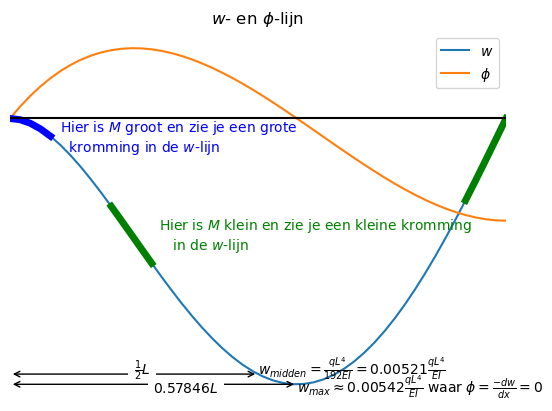

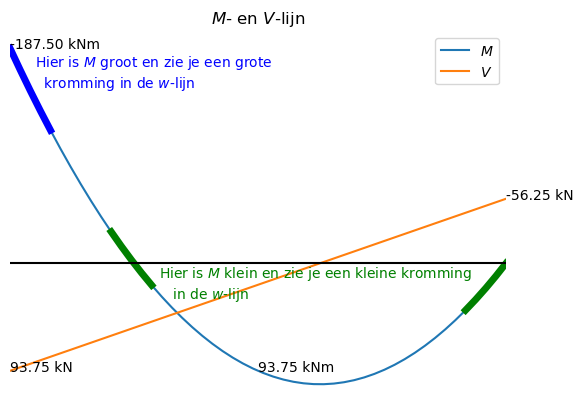

In [7]:
w_subs = w_sol.subs([(EI,10000),(q,15),(L,10)])
phi_subs = phi_sol.subs([(EI,10000),(q,15),(L,10)])
w_numpy = sp.lambdify(x,w_subs) 
phi_numpy = sp.lambdify(x,phi_subs) 
x_plot = np.linspace(0,10,50)
w_plot = w_numpy(x_plot)
phi_plot = phi_numpy(x_plot)
plt.plot(x_plot,w_plot,label='$w$')
plt.plot(x_plot,phi_plot,label='$\phi$')
plt.plot(x_plot[0:5],w_plot[0:5],linewidth=5,color='blue')
plt.plot(x_plot[10:15],w_plot[10:15],linewidth=5,color='green')
plt.plot(x_plot[45:50],w_plot[45:50],linewidth=5,color='green')
plt.gca().invert_yaxis()
plt.title("$w$- en $\phi$-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate("",[0,w_numpy(5)],[5,w_numpy(5)], arrowprops=dict(arrowstyle='<->'))
plt.text(2.5,w_numpy(5),'$\\frac{1}{2}L$',bbox = dict(fc="white", ec="none"))
plt.annotate('$w_{midden} = \\frac{q L^{4}}{192 EI} = 0.00521\\frac{q L^{4}}{EI}$', xy = [5,w_numpy(5)])
plt.annotate("",[0,w_numpy(x_phi0_subs)],[x_phi0_subs,w_numpy(x_phi0_subs)], arrowprops=dict(arrowstyle='<->'))
plt.text(x_phi0_subs/2,w_numpy(x_phi0_subs)*1.028,'$0.57846 L$',bbox = dict(fc="white", ec="none"))
plt.annotate('$w_{max} \\approx 0.00542 \\frac{q L^{4}}{EI} $ waar $\phi = \\frac{-dw}{dx} = 0$', xy = [x_phi0_subs,w_numpy(x_phi0_subs)*1.03])
plt.annotate('Hier is $M$ groot en zie je een grote \n  kromming in de $w$-lijn', xy = [1,0.01],color='blue')
plt.annotate('Hier is $M$ klein en zie je een kleine kromming \n   in de $w$-lijn', xy = [3,0.04],color='green')
plt.legend()
plt.axis('off');

M_sol  = M.subs(sol)
M_subs = M_sol.subs([(EI,10000),(q,15),(L,10)])
V_sol  = V.subs(sol)
V_subs = V_sol.subs([(EI,10000),(q,15),(L,10)])
M_numpy = sp.lambdify(x,M_subs) 
V_numpy = sp.lambdify(x,V_subs) 
M_plot = M_numpy(x_plot)
V_plot = V_numpy(x_plot)
plt.figure()
plt.plot(x_plot,M_plot,label='$M$')
plt.plot(x_plot,V_plot,label='$V$')
plt.plot(x_plot[0:5],M_plot[0:5],linewidth=5,color='blue')
plt.plot(x_plot[10:15],M_plot[10:15],linewidth=5,color='green')
plt.plot(x_plot[45:50],M_plot[45:50],linewidth=5,color='green')
plt.legend()
plt.gca().invert_yaxis()
plt.title("$M$- en $V$-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.2f kNm' % M_numpy(0),xy = [0,M_numpy(0)])
plt.annotate('%.2f kNm' % M_numpy(5),xy = [5,M_numpy(5)])
plt.annotate('%.2f kN' % V_numpy(0),xy = [0,V_numpy(0)])
plt.annotate('%.2f kN' % V_numpy(10),xy = [10,V_numpy(10)])
plt.annotate('Hier is $M$ groot en zie je een grote \n  kromming in de $w$-lijn', xy = [0.5,M_numpy(0)*0.82],color='blue')
plt.annotate('Hier is $M$ klein en zie je een kleine kromming \n   in de $w$-lijn', xy = [3,30],color='green')
plt.axis('off');